# Genome Preprocessing

Collect basic information about the genes and their promoter sequences and the Transcription fac

In [4]:

# from mapping import get_sorted_gene_order, generate_gene_id_name_map, get_master_regulator_list, get_TF_lists, get_a_matrix_threshold,\
#                     load_htf_motifs, generate_gene_id_name_map, 
from mapping import load_consensus
from genome_utils import write_df_to_meme
from constants import TEMPDIR
from activity_predictor import fetch_bed_files
from mapping import get_TF_set, get_sorted_gene_order, load_cisbp_motifs, generate_gene_id_name_map, get_master_regulator_list, get_TF_activity_lists

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
# from activity_predictor import run_pipeline

/home/nuvi/.local/lib/python3.11/site-packages/seqlogo/seqlogo.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/home/nuvi/.local/lib/python3.11/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.27.2 is exactly one major version older than the runtime version 6.31.1 at alphagenome/protos/dna_model.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/nuvi/.local/lib/python3.11/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.27.2 is exactly one major version older than the runtime version 6.31.1 at alphagenome/protos/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.


total master regulators from Old list: 439


/nfs/turbo/umms-indikar/Ram/development/projects/HardWiredGenome/mapping.py:402: UserWarning: Deprecated function, use get_TF_activity_lists instead
  warnings.warn("Deprecated function, use get_TF_activity_lists instead")


 Total Activators : 174
Total Reprossors : 705
Total Conflicted : 729
Total Transcription Factors : 1608
Extracted 43945 mappings from 73467 ensembl lines
Extracted 38606 mappings from gene id gtf file
Total Mappings Extracted 59979
TFs :  19782
Genes :  1608


In [5]:
TEMPDIR

'/scratch/indikar_root/indikar1/shared_data/HWG/data/temp'

In [6]:
motif_df = load_cisbp_motifs()

gene = 'PRRX1'
# 'PRRX1' in set(list(cisbp_motifs['TF_Name']))

motif_df[motif_df['TF_Name'] == gene]['Motif_ID'].iloc[0]
# .loc[0]

'M03324_3.00'

In [7]:
gene = 'PRRX1'


censensus, motif, gene_pwm = load_consensus(gene)


genedir = f'{TEMPDIR}/{gene}'

savepath = f'{genedir}/{gene}.meme'

print('saving to path', savepath)


if not os.path.exists(genedir):
    os.makedirs(genedir)

write_df_to_meme(gene_pwm, savepath, gene)
# write_meme_format(motif, savepath)

# print(gene_pwm)

running motif find for gene:  PRRX1
Extracted 43945 mappings from 73467 ensembl lines
Extracted 38606 mappings from gene id gtf file
Total Mappings Extracted 59979
Gene CIS-BP ID : M03324_3.00
reading motif from:  /nfs/turbo/umms-indikar/shared/projects/HWG/data/HWG/data/TF_MOTIFS/Homo_sapiens_2025_07_21_6_25_pm/pwms_all_motifs/M03324_3.00.txt
Consensus sequence: TTAATTAG
saving to path /scratch/indikar_root/indikar1/shared_data/HWG/data/temp/PRRX1/PRRX1.meme
writing meme format to /scratch/indikar_root/indikar1/shared_data/HWG/data/temp/PRRX1/PRRX1.meme


In [8]:
from constants import REFERENCE_DIR

f"{REFERENCE_DIR}/protein_coding_tss_flank_10kb.bed"

'/nfs/turbo/umms-indikar/shared/projects/HWG/data/HWG/data/REFERENCE/protein_coding_tss_flank_10kb.bed'

In [9]:


gene_id_name_map, gene_name_id_map = generate_gene_id_name_map()


gene_id_name_map.get('ENSG00000001167')

Extracted 43945 mappings from 73467 ensembl lines
Extracted 38606 mappings from gene id gtf file
Total Mappings Extracted 59979


'NFYA'

In [10]:


def process_fimo_matches():

    gene_id_name_map, gene_name_id_map = generate_gene_id_name_map()
    
    tfset = get_TF_set()
    lines = []
    for tf in tfset:
        tfname = gene_id_name_map.get(tf, tf)
        print(tfname)

        try:
            consensus, motif, gene_pwm = load_consensus(tfname, gene_id=tf)
        except:
            continue
        
        
        genedir = f'{TEMPDIR}/{tf}'
        savepath = f'{genedir}/{tf}.meme'
        print('saving to path', savepath)
        
        if not os.path.exists(genedir):
            os.makedirs(genedir)

        print(gene_pwm, motif, consensus)
        write_df_to_meme(gene_pwm, savepath, tf)
        line = f'fimo --oc {genedir} {savepath} {REFERENCE_DIR}/protein_coding_tss_flank_10kb.fa\n'
        lines.append(line)
    
    with open('/nfs/turbo/umms-indikar/Ram/slurms/Alphagenome/TF_runner.txt', 'w') as f:
        f.writelines(lines)


# process_fimo_matches()

In [11]:
# Next step is to run Fimo on each of these TFs and the 10kb flank region around TSS

In [12]:
promoter_flank = f'{REFERENCE_DIR}/protein_coding_tss_flank_10kb.bed'

promoter_flank

'/nfs/turbo/umms-indikar/shared/projects/HWG/data/HWG/data/REFERENCE/protein_coding_tss_flank_10kb.bed'

In [14]:
bed_one_m, bed_two_m, bed = fetch_bed_files()

/nfs/turbo/umms-indikar/Ram/development/projects/HardWiredGenome/activity_predictor.py:150: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_transcripts = transcripts.groupby("gene_id", group_keys=False).apply(pick_best_transcript, include_groups=True)


In [15]:
bed.columns = ["chrom","start","end","gene_id","strand","orientation"]

promoters = bed

In [16]:
chr19 = 'chr19'

prom_by_chrom = {c: g for c, g in promoters.groupby("chrom")}
prom_by_chrom.get(chr19)

,chrom,start,end,gene_id,strand,orientation
56,chr19,35747029,35767029,ENSG00000004776,.,-
57,chr19,35765514,35785514,ENSG00000004777,.,+
72,chr19,18821958,18841958,ENSG00000005007,.,+
86,chr19,2318683,2338683,ENSG00000005206,.,+
114,chr19,18578684,18598684,ENSG00000006015,.,+
...,...,...,...,...,...,...
19668,chr19,12677997,12697997,ENSG00000283980,.,+
19676,chr19,12792062,12812062,ENSG00000284491,.,+
19706,chr19,18245419,18265419,ENSG00000285188,.,-
19746,chr19,37682315,37702315,ENSG00000290988,.,-


In [17]:
lss = ['DUX1_HUMAN', 'DUX3_HUMAN']

for tf in lss:
    print(f'processing TF {tf}')
    fimopath = f'{TEMPDIR}/{tf}/fimo.tsv'

    if os.path.exists(fimopath):
        fimo = pd.read_csv(fimopath, sep="\t")
    print(fimo)
    

processing TF DUX1_HUMAN
                                                motif_id  motif_alt_id  \
0                                                  PRRX1           NaN   
1                                                  PRRX1           NaN   
2                                                  PRRX1           NaN   
3                                                  PRRX1           NaN   
4                                                  PRRX1           NaN   
...                                                  ...           ...   
54246                                              PRRX1           NaN   
54247                                              PRRX1           NaN   
54248  # FIMO (Find Individual Motif Occurrences): Ve...           NaN   
54249  # The format of this file is described at http...           NaN   
54250  # fimo --oc /scratch/indikar_root/indikar1/sha...           NaN   

      sequence_name        start         stop strand    score       p-value  \
0      

In [18]:

def calculate_hits(proms, fimos, tf):
    results = []
    for _, prom in proms.iterrows():
        # chromdf[(chromdf['start'] <= start) & (chromdf['end'] >= end)]
        gene_id, start, end = prom['gene_id'], prom['start'], prom['end']
        stop = end
        matches = fimos[(fimos['start'] >= start) & (fimos['stop'] <= stop)]
        # hit_df = pd.DataFrame([{'TF': tf, 'gene': gene_id, 'matches': len(matches)}])
        
        hits = (tf, gene_id, len(matches), matches)
        # resdf = pd.DataFrame({'TF': tf, 'gene': gene_id, 'matches': len(matches)}, columns=["TF", "gene", "matches"])
        
        results.append(hits)
    return results

def plot_matches_by_gene(chrom, tflist):
    
    prom_by_chrom = {c: g for c, g in promoters.groupby("chrom")}

    genes = get_sorted_gene_order()

    all_hits = []
    for tf in tflist:
        print(f'processing TF {tf}')
        fimopath = f'{TEMPDIR}/{tf}/fimo.tsv'

        if os.path.exists(fimopath):
            fimo = pd.read_csv(fimopath, sep="\t")
            
        else:
            print(f'tf not found: {tf}')
            continue

        try:
            fimo_by_chrom = {c: g for c, g in fimo.groupby("sequence_name")}
        except Exception as e:
            print("Failed running for TF: ", tf)


        if chrom:
            proms = prom_by_chrom.get(chrom)
            fimos = fimo_by_chrom.get(chrom)
            all_hits.extend(calculate_hits(proms, fimos, tf))
            
        else:
            for chrom in fimo_by_chrom.keys():
                proms = prom_by_chrom.get(chrom)
                fimos = fimo_by_chrom.get(chrom)
                
                all_hits.extend(calculate_hits(proms, fimos, tf))

    df = pd.DataFrame(all_hits, columns=["TF", "gene", "matchcounts", "matches"])
    
    match_matrix = df.pivot_table(index="TF", columns="gene", values="matchcounts", fill_value=0)

    
    match_matrix.columns.name = 'genes'

    return match_matrix
    # hits_df = pd.concat(all_hits, ignore_index=True)
    # return hits_df
        
        # for _, row in fimo.iterrows():
        #     chrom, start, stop = row['sequence_name'], row['start'], row['stop']
        #     end = stop
            
        #     chromdf = prom_by_chrom[chrom]
        #     matches = chromdf[(chromdf['start'] <= start) & (chromdf['end'] >= end)]
        #     hits.append()


master_regulator_list = get_master_regulator_list()
repressorlist, activatorlist, conflictedlist, tf_list = get_TF_activity_lists()


# activator_df = plot_matches_by_gene(chr19, activatorlist)
# repressor_df = plot_matches_by_gene(chr19, repressorlist)
# conflicted_df = plot_matches_by_gene(chr19, conflictedlist)

print('done')

total master regulators from Old list: 439
processed 1639 Transcription Factors
Extracted 43945 mappings from 73467 ensembl lines
Extracted 38606 mappings from gene id gtf file
Total Mappings Extracted 59979
 Total Activators : 329
Total Reprossors : 259
Total Conflicted : 207
Total Transcription Factors : 1639
done


/nfs/turbo/umms-indikar/Ram/development/projects/HardWiredGenome/mapping.py:383: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  classification = TF_activity_TRRUST.groupby("TF").apply(classify_effect).reset_index(name="Class")


In [20]:
csv_path = 'data/TFactivity/activator_TF_by_gene_hits.csv'
# activator_df.to_csv(csv_path)

activator_df = pd.read_csv(csv_path, index_col="TF")


csv_path = 'data/TFactivity/repressor_TF_by_gene_hits.csv'
# repressor_df.to_csv(csv_path)

repressor_df = pd.read_csv(csv_path, index_col="TF")


csv_path = 'data/TFactivity/conflicted_TF_by_gene_hits.csv'
# conflicted_df.to_csv(csv_path)

conflicted_df = pd.read_csv(csv_path, index_col="TF")




In [138]:
    import pandas as pd

    data = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}
    df = pd.DataFrame(data)

    # Summing along axis=0 (down the columns, resulting in sum of each column)
    column_sums = repressor_df.sum(axis=0)
    print("Column Sums (axis=0):\n", column_sums)

Column Sums (axis=0):
 ENSG00000004776    1931.0
ENSG00000004777     733.0
ENSG00000005007     449.0
ENSG00000005206    1259.0
ENSG00000006015    1143.0
                    ...  
ENSG00000283980    1162.0
ENSG00000284491    1529.0
ENSG00000285188     884.0
ENSG00000290988     754.0
ENSG00000293495     618.0
Length: 1393, dtype: float64


In [137]:
    import pandas as pd

    data = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}
    df = pd.DataFrame(data)

    # Summing along axis=1 (across the rows, resulting in sum of each row)
    row_sums = df.sum(axis=1)
    print("\nRow Sums (axis=1):\n", row_sums)


Row Sums (axis=1):
 0    5
1    7
2    9
dtype: int64


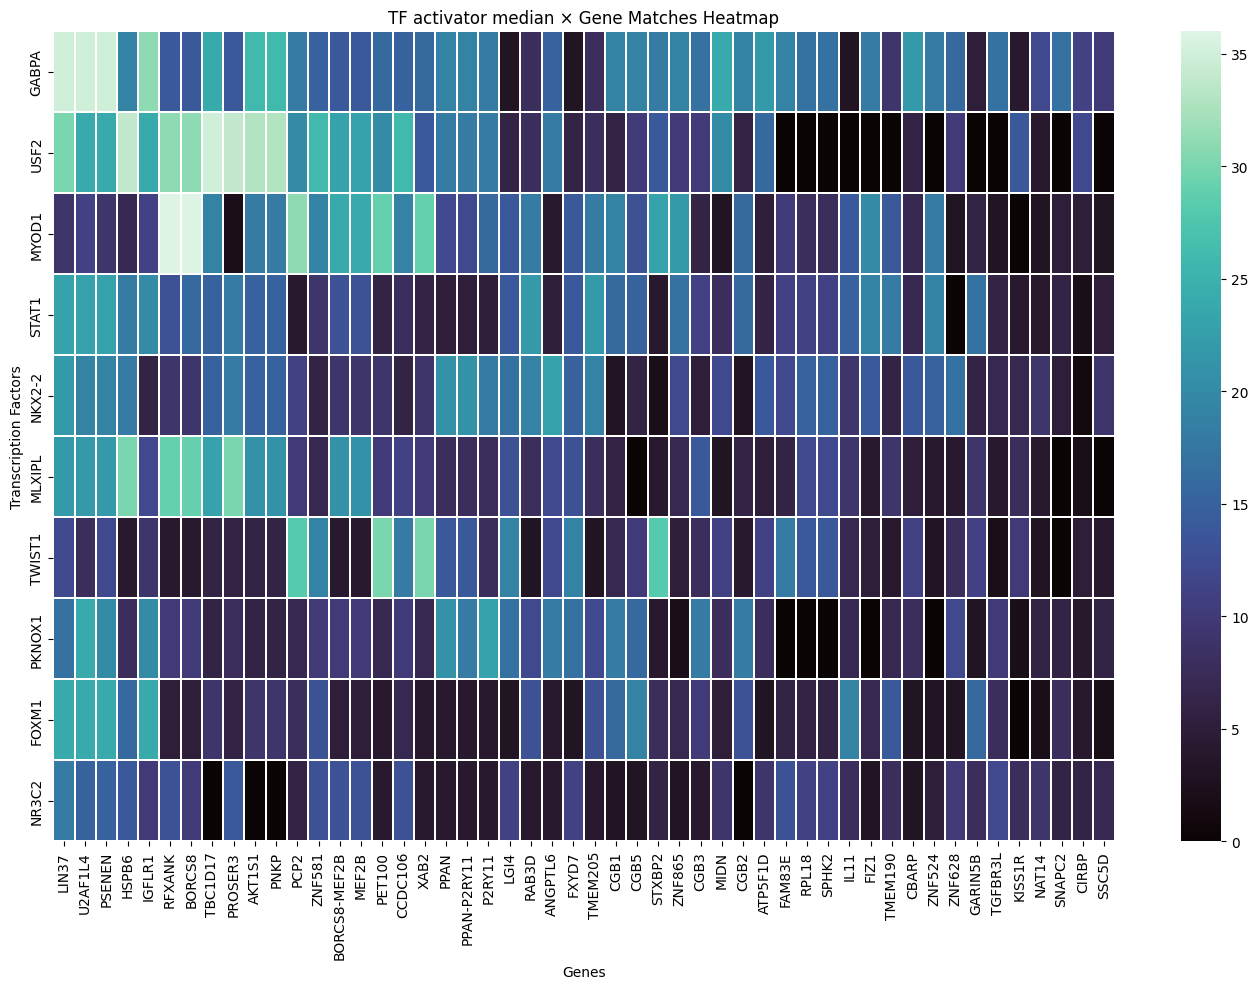

In [27]:

# matrix = hits_df.loc[:, hits_df.columns.isin(repressorlist)]
tftype = 'activator median'
matrix = activator_df

matrix = matrix.rename(index=gene_id_name_map, columns=gene_id_name_map)

# If we want to get the max or minimum matches
gene_sums = matrix.sum(axis=0).sort_values(ascending=False)
tf_sums = matrix.sum(axis=1).sort_values(ascending=False)

top_tfs = tf_sums.head(30).index
top_genes = gene_sums.head(50).index


# subset = matrix.loc[top_tfs, top_genes]


# But usually these contain either a lot of repetitive and overlapping motifs or very few important motifs. 
# so we take n values around the median

median_val = tf_sums.median()
row_sums_diff = (tf_sums - median_val).abs()

tfs_around_median = row_sums_diff.nsmallest(10).index


subset = matrix.loc[tfs_around_median, top_genes]


# Sorting these within the subset
row_sums = subset.sum(axis=1).sort_values(ascending=False)
col_sums = subset.sum(axis=0).sort_values(ascending=False)

subset = subset.loc[row_sums.index, col_sums.index]




plt.figure(figsize=(14, 10))
sns.heatmap(subset, cmap="mako", linewidths=0.3)
plt.title(f"TF {tftype} × Gene Matches Heatmap")
plt.xlabel("Genes")
plt.ylabel("Transcription Factors")
plt.tight_layout()
# plt.show()
plt.savefig(f'figures/TFactivity/tf_{tftype}_gene_matches.png', dpi=300,  bbox_inches='tight')

In [147]:
subset

,P2RY11,U2AF1L4,PPAN,PPAN-P2RY11,PSENEN,LIN37,BORCS8,HSPB6,IGFLR1,PROSER3,...,UNC13A,ZNF492,ZNF90,AKAP8,ZNF331,ZNF571,PDCD2L,OR7C2,ZNF471,ZNF230
TF,,,,,,,,,,,,,,,,,,,,,
PAX2,16.0,14.0,19.0,19.0,14.0,11.0,25.0,25.0,10.0,27.0,...,1.0,2.0,2.0,5.0,3.0,1.0,2.0,3.0,1.0,0.0
NR2F1,6.0,29.0,7.0,7.0,29.0,29.0,16.0,24.0,25.0,24.0,...,2.0,3.0,4.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0
TGIF1,16.0,24.0,14.0,14.0,20.0,17.0,10.0,8.0,20.0,8.0,...,0.0,0.0,3.0,3.0,2.0,0.0,3.0,5.0,0.0,0.0
NR4A2,4.0,14.0,4.0,4.0,14.0,14.0,19.0,10.0,15.0,10.0,...,2.0,0.0,3.0,0.0,0.0,2.0,0.0,2.0,1.0,2.0
NFAT5,9.0,22.0,12.0,12.0,22.0,22.0,8.0,22.0,17.0,17.0,...,1.0,6.0,3.0,2.0,4.0,4.0,2.0,1.0,6.0,6.0
ASCL1,20.0,24.0,18.0,18.0,24.0,24.0,0.0,4.0,24.0,4.0,...,2.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0
THRA,36.0,5.0,30.0,30.0,5.0,5.0,18.0,5.0,3.0,5.0,...,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
THRB,42.0,10.0,34.0,34.0,10.0,13.0,18.0,16.0,3.0,16.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
ZEB1,8.0,22.0,11.0,11.0,22.0,19.0,8.0,17.0,22.0,17.0,...,4.0,1.0,1.0,0.0,3.0,4.0,1.0,1.0,1.0,1.0


In [48]:

start= 17567200
end = 17567210
chrom = 'chr4'

chromdf = prom_by_chrom[chrom]

chromdf[(chromdf['start'] <= start) & (chromdf['end'] >= end)]

,chrom,start,end,gene_id,strand,orientation
21,chr4,17567197,17587197,ENSG00000002549,.,+


In [37]:
prom_by_chrom['chr4']

,chrom,start,end,gene_id,strand,orientation
21,chr4,17567197,17587197,ENSG00000002549,.,+
23,chr4,11418894,11438894,ENSG00000002587,.,-
49,chr4,15768327,15788327,ENSG00000004468,.,+
75,chr4,109674439,109694439,ENSG00000005059,.,+
164,chr4,16065778,16085778,ENSG00000007062,.,-
...,...,...,...,...,...,...
19328,chr4,69629642,69649642,ENSG00000271271,.,-
19351,chr4,76241720,76261720,ENSG00000272414,.,+
19354,chr4,43320,63320,ENSG00000272602,.,+
19368,chr4,566295,586295,ENSG00000273238,.,-
